# Table of Contents


## [0. Install Monk](#0)


## [1. Load data](#1)


## [2. Try different base models on partial dataset](#2)


## [3. Analyse what batch size does the trick](#3)


## [4. Analyse which learning rate suites the best](#4)


## [5. Try out different optimizers on partial dataset](#5)


## [6. Train](#6)


## [7. Run inference on trained classifier](#7)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 2126 (delta 124), reused 132 (delta 60), pack-reused 1905
Receiving objects: 100% (2126/2126), 73.73 MiB | 44.91 MiB/s, done.
Resolving deltas: 100% (1144/1144), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu10.txt

## Dataset - Weed species classification
    - https://github.com/AlexOlsen/DeepWeeds

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FjwRgyJ426y9tsTkvT_dx3vUgumRp3lN' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FjwRgyJ426y9tsTkvT_dx3vUgumRp3lN" -O weed_data.zip && rm -rf /tmp/cookies.txt

In [16]:
! unzip -qq weed_data.zip

## Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load Data

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "weed_species_classification");

Mxnet Version: 1.5.0

Experiment Details
    Project: project
    Experiment: weed_species_classification
    Dir: /home/ubuntu/Desktop/weed/workspace/project/weed_species_classification/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------project
                    |
                    |
                    |-----weed_species_classification
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

In [4]:
gtf.Default(dataset_path="weed_data/images",
            path_to_csv="weed_data/train_labels.csv",
            model_name="resnet18_v1", 
            freeze_base_network=False,
            num_epochs=10);

Dataset Details
    Train path:     weed_data/images
    Val path:       None
    CSV train path: weed_data/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 12256
    Num val images:   5253
    Num classes:      9

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable l

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


<a id='2'></a>
# Try different base models on partial dataset

In [8]:
gtf.List_Models();

Models List: 
    1. alexnet
    2. darknet53
    3. densenet121
    4. densenet161
    5. densenet169
    6. densenet201
    7. inceptionv3
    8. mobilenet1.0
    9. mobilenet0.75
    10. mobilenet0.25
    11. mobilenet0.5
    12. resnet18_v1
    13. resnet34_v1
    14. resnet50_v1
    15. resnet101_v1
    16. resnet152_v1
    17. resnext50_32x4d
    18. resnext101_32x4d
    19. resnext101_64x4d_v1
    20. se_resnext50_32x4d
    21. se_resnext101_32x4d
    22. se_resnext101_64x4d
    23. senet_154
    24. vgg11
    25. vgg13
    26. vgg16
    27. vgg19
    28. vgg11_bn
    29. vgg13_bn
    30. vgg16_bn
    31. vgg19_bn
    32. resnet18_v2
    33. resnet34_v2
    34. resnet50_v2
    35. resnet101_v2
    36. resnet152_v2
    37. mobilenetv2_1.0
    38. mobilenetv2_0.75
    39. mobilenetv2_0.5
    40. mobilenetv2_0.25
    41. squeezenet1.0
    42. squeezenet1.1
    43. mobilenetv3_large
    44. mobilenetv3_small
    45. resnet18_v1b
    46. resnet34_v1b
    47. resnet50_v1b
    48. resn

In [9]:
# Analysis Project Name
analysis_name = "analyse_models";

# Models to analyse
# First element in the list- Model Name
# Second element in the list - Boolean value to freeze base network or not
# Third element in the list - Boolean value to use pretrained model as the starting point or not
models = [["resnet18_v1", True, True], ["resnet152_v2", False, True], 
          ["densenet121", True, True], ["densenet201", False, True],
          ["mobilenetv3_large", False, True], ["resnext101_64x4d", False, True]];  

# Num epochs for each experiment to run	
epochs=10;

# Percentage of original dataset to take in for experimentation
percent_data=5;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
analysis = gtf.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_none"); 


Running Model analysis
Analysis Name      : analyse_models

Running experiment : 1/6
Experiment name    : Model_resnet18_v1_freeze_base_pretrained
Estimated time     : 35.8750581741333 sec
Experiment Complete


Running experiment : 2/6
Experiment name    : Model_resnet152_v2_unfreeze_base_pretrained
Model file is not found. Downloading.


132432KB [00:02, 53485.00KB/s]                            


Estimated time     : 3 min
Experiment Complete


Running experiment : 3/6
Experiment name    : Model_densenet121_freeze_base_pretrained
Model file is not found. Downloading.


100%|██████████| 29622/29622 [00:00<00:00, 54362.77KB/s]


Estimated time     : 53.97014617919922 sec
Experiment Complete


Running experiment : 4/6
Experiment name    : Model_densenet201_unfreeze_base_pretrained
Model file is not found. Downloading.


74804KB [00:01, 43002.65KB/s]                           


Estimated time     : 3 min
Experiment Complete


Running experiment : 5/6
Experiment name    : Model_mobilenetv3_large_unfreeze_base_pretrained
Model file is not found. Downloading.


12366KB [00:00, 22499.78KB/s]                          


Estimated time     : 4 min
Experiment Complete


Running experiment : 6/6
Experiment name    : Model_resnext101_64x4d_unfreeze_base_pretrained
Model file is not found. Downloading.


100%|██████████| 188766/188766 [00:03<00:00, 59595.55KB/s]


Estimated time     : 5 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_models
Generated statistics post all epochs
| Experiment Name                                  |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|--------------------------------------------------+-------------+-----------+--------------+------------|
| Model_resnet18_v1_freeze_base_pretrained         |    0.644219 |  0.488636 |     1.07599  |   1.45052  |
| Model_resnet152_v2_unfreeze_base_pretrained      |    0.818297 |  0.625    |     0.542959 |   1.08301  |
| Model_densenet121_freeze_base_pretrained         |    0.664549 |  0.545455 |     0.965933 |   1.34376  |
| Model_densenet201_unfreeze_base_pretrained       |    0.96061  |  0.738636 |     0.170394 |   0.738567 |
| Model_mobilenetv3_large_unfreeze_base_pretrained |    0.947903 |  0.738636 |     0.216777 |   0.939349 |
| Model_resnext101_64x4d_unfreeze_base_pretrained  |    0.893266 |  0.715909 |     0.333811 |   0

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [5]:
# Lets select densenet201
#As per results set the apropriate model
gtf.update_model_name("densenet201");
gtf.update_freeze_base_network(False);
gtf.update_use_pretrained(True);

gtf.Reload();

Update: Model name - densenet201

Update: Freeze Base Network - False

Update: Use pretrained - True

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 12256
    Num val images:   5253
    Num classes:      9

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet201
        Num of potentially trainable layers:  402
        Num of actual trainable layers:       402



<a id='3'></a>
# Try different batch sizes on partial dataset

In [6]:
# Analysis Project Name
analysis_name = "analyse_batch_sizes";

# Batch sizes to explore - set the max as per the gpu limit
#batch size -64 takes in 14000 Mb of GPU RAM
batch_sizes = [4, 16, 32, 64];

# Num epochs for each experiment to run	
epochs = 10;

# Percentage of original dataset to take in for experimentation
percent_data = 10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created	
analysis = gtf.Analyse_Batch_Sizes(analysis_name, batch_sizes, percent_data, 
                                   num_epochs=epochs, state="keep_none"); 



Running Batch Size analysis
Analysis Name      : analyse_batch_sizes

Running experiment : 1/4
Experiment name    : Batch_Size_4
Estimated time     : 5 min
Experiment Complete


Running experiment : 2/4
Experiment name    : Batch_Size_16
Estimated time     : 3 min
Experiment Complete


Running experiment : 3/4
Experiment name    : Batch_Size_32
Estimated time     : 3 min
Experiment Complete


Running experiment : 4/4
Experiment name    : Batch_Size_64
Estimated time     : 4 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_batch_sizes
Generated statistics post all epochs
| Experiment Name   |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------+-------------+-----------+--------------+------------|
| Batch_Size_4      |    0.926984 |  0.834286 |    0.233261  |   0.485876 |
| Batch_Size_16     |    0.993016 |  0.811429 |    0.0369155 |   0.63565  |
| Batch_Size_32     |    0.995556 |  0.782857 |    0.0763072 |   0.564173 |
| Ba

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [6]:
#As per results set the apropriate batch size
gtf.update_batch_size(64);

gtf.Reload();

Update: Batch size - 64

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 12256
    Num val images:   5253
    Num classes:      9

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet201
        Num of potentially trainable layers:  402
        Num of actual trainable layers:       402



<a id='4'></a>
# Try different initial learning rates

In [8]:
# Analysis Project Name
analysis_name = "analyse_learning_rates"

# Learning rates to explore
lrs = [0.1, 0.05, 0.01, 0.005, 0.0001];

# Num epochs for each experiment to run
epochs=10

# Percentage of original dataset to take in for experimentation
percent_data=10

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
analysis = gtf.Analyse_Learning_Rates(analysis_name, lrs, percent_data, num_epochs=epochs, state="keep_none"); 



Running Learning rate analysis
Analysis Name      : analyse_learning_rates

Running experiment : 1/5
Experiment name    : Learning_Rate_0.1
Estimated time     : 4 min
Experiment Complete


Running experiment : 2/5
Experiment name    : Learning_Rate_0.05
Estimated time     : 4 min
Experiment Complete


Running experiment : 3/5
Experiment name    : Learning_Rate_0.01
Estimated time     : 4 min
Experiment Complete


Running experiment : 4/5
Experiment name    : Learning_Rate_0.005
Estimated time     : 4 min
Experiment Complete


Running experiment : 5/5
Experiment name    : Learning_Rate_0.0001
Estimated time     : 4 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_learning_rates
Generated statistics post all epochs
| Experiment Name      |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|----------------------+-------------+-----------+--------------+------------|
| Learning_Rate_0.1    |    0.540317 |  0.554286 |   1.49866    |   1.27146  |
|

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [7]:
#As per results set the apropriate learning rate
gtf.update_learning_rate(0.01);

gtf.Reload();

Update: Learning Rate - 0.01

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 12256
    Num val images:   5253
    Num classes:      9

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet201
        Num of potentially trainable layers:  402
        Num of actual trainable layers:       402



<a id='5'></a>
# Try different optimizers on partial dataset

In [9]:
# Analysis Project Name
analysis_name = "analyse_optimizers";

# Optimizers to explore
optimizers = ["sgd", "adam", "nesterov_adam", "adagrad"];   #Model name, learning rate

# Num epochs for each experiment to run	
epochs = 5;

# Percentage of original dataset to take in for experimentation
percent_data = 10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
analysis = gtf.Analyse_Optimizers(analysis_name, optimizers, percent_data, num_epochs=epochs, state="keep_none"); 


Running Optimizer analysis
Analysis Name      : analyse_optimizers

Running experiment : 1/4
Experiment name    : Optimizer_sgd


monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Estimated time     : 2 min
Experiment Complete


Running experiment : 2/4
Experiment name    : Optimizer_adam


monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: amsgrad is active only for keras and pytorch in current version of Monk
  warnings.warn(msg)


Estimated time     : 2 min
Experiment Complete


Running experiment : 3/4
Experiment name    : Optimizer_nesterov_adam


monk_v1/monk/system/imports.py:193: UserWarning: OptimizerWarning: nesterov adam is active only for keras and gluon in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: amsgrad is inactive in current version of Monk
  warnings.warn(msg)


Estimated time     : 2 min
Experiment Complete


Running experiment : 4/4
Experiment name    : Optimizer_adagrad


monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: learning_rate_decay is active only for pytorch in current version of Monk
  warnings.warn(msg)


Estimated time     : 2 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_optimizers
Generated statistics post all epochs
| Experiment Name         |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------------+-------------+-----------+--------------+------------|
| Optimizer_sgd           |    0.970794 |  0.822857 |     0.201979 |   0.538837 |
| Optimizer_adam          |    0.514921 |  0.548571 |     1.4757   |   1.31199  |
| Optimizer_nesterov_adam |    0.521905 |  0.491429 |     1.43264  |   1.36158  |
| Optimizer_adagrad       |    0.55873  |  0.64     |     1.29164  |   1.09438  |



<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [8]:
#As per results set the appropriate 
gtf.optimizer_sgd(0.001);

gtf.Reload();

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 12256
    Num val images:   5253
    Num classes:      9

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet201
        Num of potentially trainable layers:  402
        Num of actual trainable layers:       402



<a id='6'></a>
# Train

In [9]:
gtf.Train();

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.536, Train-loss: 1.447 | Val-acc: 0.607272, Val-loss: 1.144, | time: 75.8 sec

    Epoch 2/10
    ----------




    curr_lr - 0.001
    [Epoch 2] Train-acc: 0.690, Train-loss: 0.952 | Val-acc: 0.714830, Val-loss: 0.882, | time: 75.7 sec

    Epoch 3/10
    ----------




    curr_lr - 0.001
    [Epoch 3] Train-acc: 0.764, Train-loss: 0.742 | Val-acc: 0.758995, Val-loss: 0.737, | time: 75.6 sec

    Epoch 4/10
    ----------




    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.809, Train-loss: 0.609 | Val-acc: 0.791738, Val-loss: 0.651, | time: 75.4 sec

    Epoch 5/10
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.839, Train-loss: 0.515 | Val-acc: 0.814582, Val-loss: 0.583, | time: 75.6 sec

    Epoch 6/10
    ----------




    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.861, Train-loss: 0.451 | Val-acc: 0.833429, Val-loss: 0.519, | time: 75.5 sec

    Epoch 7/10
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.881, Train-loss: 0.391 | Val-acc: 0.838568, Val-loss: 0.492, | time: 75.6 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.896, Train-loss: 0.350 | Val-acc: 0.851513, Val-loss: 0.457, | time: 75.8 sec

    Epoch 9/10
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.908, Train-loss: 0.309 | Val-acc: 0.853607, Val-loss: 0.436, | time: 75.7 sec

    Epoch 10/10
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.916, Train-loss: 0.280 | Val-acc: 0.863316, Val-loss: 0.412, | time: 76.1 sec

    Training completed in: 12m 30s
    Best val Acc:          0.863316

Training End

Training Outputs
    Model Dir:   /home/ubuntu/Desktop/weed/workspace/project/weed_species_classification/output/models/
    Log Dir:     /home/ubuntu/Desktop/weed/workspace/project/weed_species_classification/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

<a id='6'></a>
# Infer on Training Data

In [10]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "weed_species_classification", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/project/weed_species_classification/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: project
    Experiment: weed_species_classification
    Dir: /home/ubuntu/Desktop/weed/workspace/project/weed_species_classification/



Prediction
    Image name:         weed_data/test/test1.jpg
    Predicted class:      Lantana
    Predicted score:      2.7695631980895996



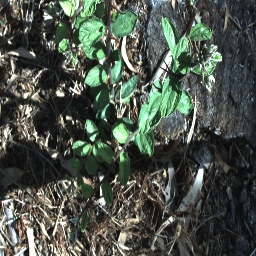

In [18]:
output = gtf.Infer(img_name = "weed_data/test/test1.jpg");
from IPython.display import Image
Image(filename='weed_data/test/test1.jpg') 

Prediction
    Image name:         weed_data/test/test2.jpg
    Predicted class:      Snake weed
    Predicted score:      7.462121486663818



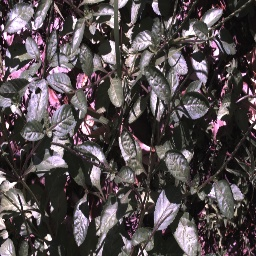

In [19]:
output = gtf.Infer(img_name = "weed_data/test/test2.jpg");
from IPython.display import Image
Image(filename='weed_data/test/test2.jpg') 